In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import nbinom


In [11]:
si = 30
y = np.arange(0, si)
k = int(input("Введите коэфициент к"))
p1 = float(input("Введите вероятность"))
p2 = 0.3


Введите коэфициент к3
Введите вероятность0.5


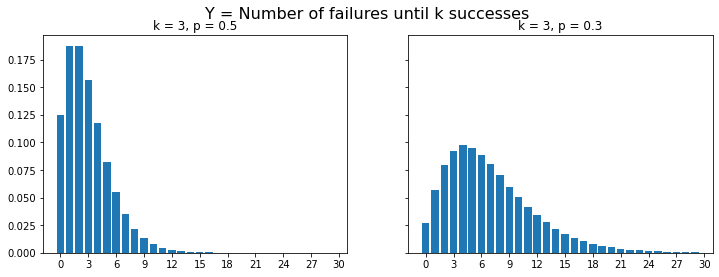

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax[0].bar(y, nbinom.pmf(y, k, p1))
ax[0].set_xticks(np.linspace(0, si, num=11))
ax[0].set_title(f"k = {k}, p = {p1}")

ax[1].bar(y, nbinom.pmf(y, k, p2))
ax[1].set_xticks(np.linspace(0, si, num=11))
ax[1].set_title(f"k = {k}, p = {p2}")

fig.suptitle("Y = Number of failures until k successes", fontsize=16);

In [13]:
print(nbinom.pmf(y, k, p1)[0])
print(nbinom.pmf(y, k, p1)[3])

0.12499999999999997
0.15624999999999992


In [14]:
import math
M = (k*(1-p1))/p1
D = (k*(1-p1))/math.pow(p1, 2)
print(M, D)

3.0 6.0


In [15]:
#интервальая оценка матожидания
eps = np.sqrt(3)*np.sqrt(D/len(y))

(M-eps, M+eps)

(2.2254033307585166, 3.7745966692414834)

In [16]:
#интервальная оценка дисперсии
from scipy import stats
chi_r = stats.chi2.ppf(0.1, len(y)-1)
chi_l = stats.chi2.ppf(0.9, len(y)-1)

((len(y)-1)*D/chi_l, (len(y)-1)*D/chi_r)

(4.451554450077437, 8.802218598014969)

In [8]:
#точечные оценки мат ожидания и дисперсии
import math
import numpy as np
import scipy.stats as sct

def truncated_Nbinom(n, p, max_value, size):
    temp_size = size
    while True:
        temp_size *= 2
        temp = sct.nbinom.rvs(n, p, size = temp_size)
        truncated = temp[temp <= max_value]
        if len(truncated) >= size:
            return truncated[: size]

m =0
input_1 = truncated_Nbinom(k, p1, si, 100000).tolist()
for item in input_1:
    m += item
m /=100000

d = 0
for item in input_1:
    d += math.pow((item - m), 2)
d/=100000
print(m)
print(d)

3.0032
5.993469760000113


In [9]:
arr = [0]*si
for item in input_1:
    if item < len(arr):
        arr[item] += 1
for i in range(0, len(arr)):
    arr[i]/=100000

schet = 0
#print(arr)
y = np.arange(0, si)
theor = sct.nbinom.pmf(y, k, p1)
#print()
for i in range(0 , si):
    schet += math.pow((arr[i]-theor[i]), 2)/theor[i]
print(schet)
print(schet < sct.chi2.ppf(0.9, si - 3))

0.00033890027082319937
True
